In [1]:
%matplotlib inline

In [2]:
import os
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [3]:
def preData():
    business_abspath = os.path.abspath("../data/business.csv")
    df = pd.read_csv(business_abspath)
    category_abspath = os.path.abspath("../data/categories.txt")
    categories=[]
    with open(category_abspath) as f:   
        reader = csv.reader(f)
        for ele in reader:
            categories.extend(ele)
    categories = [i.strip() for i in categories]
    df['categories'] = df['categories'].apply(lambda s:
                   [i.strip() for i in s.split('[')[-1].split(']')[0].replace('\'','').split(',')])
    for ele in categories:
        df[ele] = df['categories'].apply(lambda x: 1 if ele in x else 0)
    slices = [df[ele].sum() for ele in categories]
    df_result = pd.DataFrame(slices,index=categories,columns=['count'])
    df_result.sort_values(by='count',inplace=True,ascending=False)
    df_result.reset_index(inplace=True)
    df_result.columns = ['category','count']
    return df_result

In [7]:
def preData_Restaurant():
    business_abspath = os.path.abspath("../data/business.csv")
    df = pd.read_csv(business_abspath)
    restaurant_abspath = os.path.abspath("../data/restaurant.txt")
    restaurant=[]
    with open(restaurant_abspath) as f:   
        reader = csv.reader(f)
        for ele in reader:
            restaurant.extend(ele)
    restaurant = [i.strip() for i in restaurant]
    df['categories'] = df['categories'].apply(lambda s:
                   [i.strip() for i in s.split('[')[-1].split(']')[0].replace('\'','').split(',')])
    for ele in restaurant:
        df[ele] = df['categories'].apply(lambda x: 1 if ele in x else 0)
    slices = [df[ele].sum() for ele in restaurant]
    df_result = pd.DataFrame(slices,index=restaurant,columns=['count'])
    df_result.sort_values(by='count',inplace=True,ascending=False)
    df_result.reset_index(inplace=True)
    df_result.columns = ['restaurant','count']
    return df_result

In [34]:
def plot_result(N=8, M=6):
    fig = plt.figure(figsize=(16,8))
    cols = ['r','m','y','b','g','#00FA9A','#8E8E38','#97FFFF','#6959CD','#778899','#7FFF00']
    
    ax1 = plt.subplot(121)
    df_category = preData()
    categories_top = list(df_category[:N]['category'].values)
    categories_top.append('others')
    slices_top = list(df_category[:N]['count'].values)
    slices_top.append(df_category[N:]['count'].sum())
    ax1.pie(slices_top,labels=categories_top,colors=cols,startangle=90,shadow= True,
           explode = (0.08,0.04)+(0,)*(N-1),labeldistance=1.1,autopct='%1.1f%%')
    ax1.set_title('Categories Percentage',fontsize=25)
    
    ax2 = plt.subplot(122)
    df_restaurant = preData_Restaurant()
    restaurant_top = list(df_restaurant[:M]['restaurant'].values)
    restaurant_top.append('others')
    slices_top = list(df_restaurant[:M]['count'].values)
    slices_top.append(df_restaurant[M:]['count'].sum())
    ax2.pie(slices_top,labels=restaurant_top,colors=cols,startangle=90,shadow= True,
           explode = (0.05,0.04)+(0,)*(M-1),labeldistance=1.1,autopct='%1.1f%%')
    ax2.set_title('Restaurant Percentage',fontsize=25)

    plt.show()

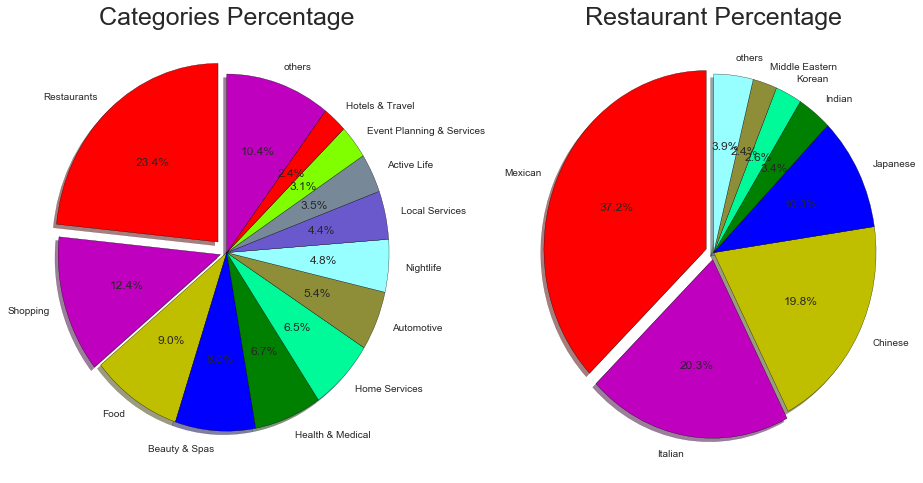

In [36]:
plot_result()